In [1]:
from PIL import ImageFont,Image,ImageDraw
from math import ceil

In [2]:
#function to calculate the number of characters that can fit in a line
def char_per_line(imgWidth, padding,fontSize):
    char_num = ceil(((0.9*imgWidth-(2*padding))/fontSize))
    return char_num

In [3]:
#function to add new line characters
def add_newline_char(caption,line_size):
    temp = caption.split(' ')
    counter = 0
    output = ''
    for i in temp:
        counter+=len(i)
        if(counter>line_size):
            output+=i+'\n'
            counter = 0
        else:
            output+=i+' '
    return output

In [8]:
def make_meme(string,filename,isWhite=True, optional=1):
    img =  Image.open(filename)
    
    #This allows us to retouch our images
    draw = ImageDraw.Draw(img)
    
    
    imageSize = img.size
    fontRatio = 0.05
    paddingRatio = 0.05
    
    fontSize = int(imageSize[1]*fontRatio)
    
    #define the font and font size of the image
    font = ImageFont.truetype("/Library/Fonts/Impact.ttf", fontSize)
    padding = ceil(paddingRatio*imageSize[0])
    char_num = char_per_line(imageSize[0], padding, fontSize)
    
    string = add_newline_char(string,char_num)
    pos = tuple(map(lambda x: x*paddingRatio,imageSize))
    
    if(isWhite):
        colour=(255,255,255,255)
    else:
        colour=(0,0,0,255)
    
    draw.text(pos,string, font=font, fill=colour)
    img.save("Completed/output"+str(optional)+".png")
    
    return img

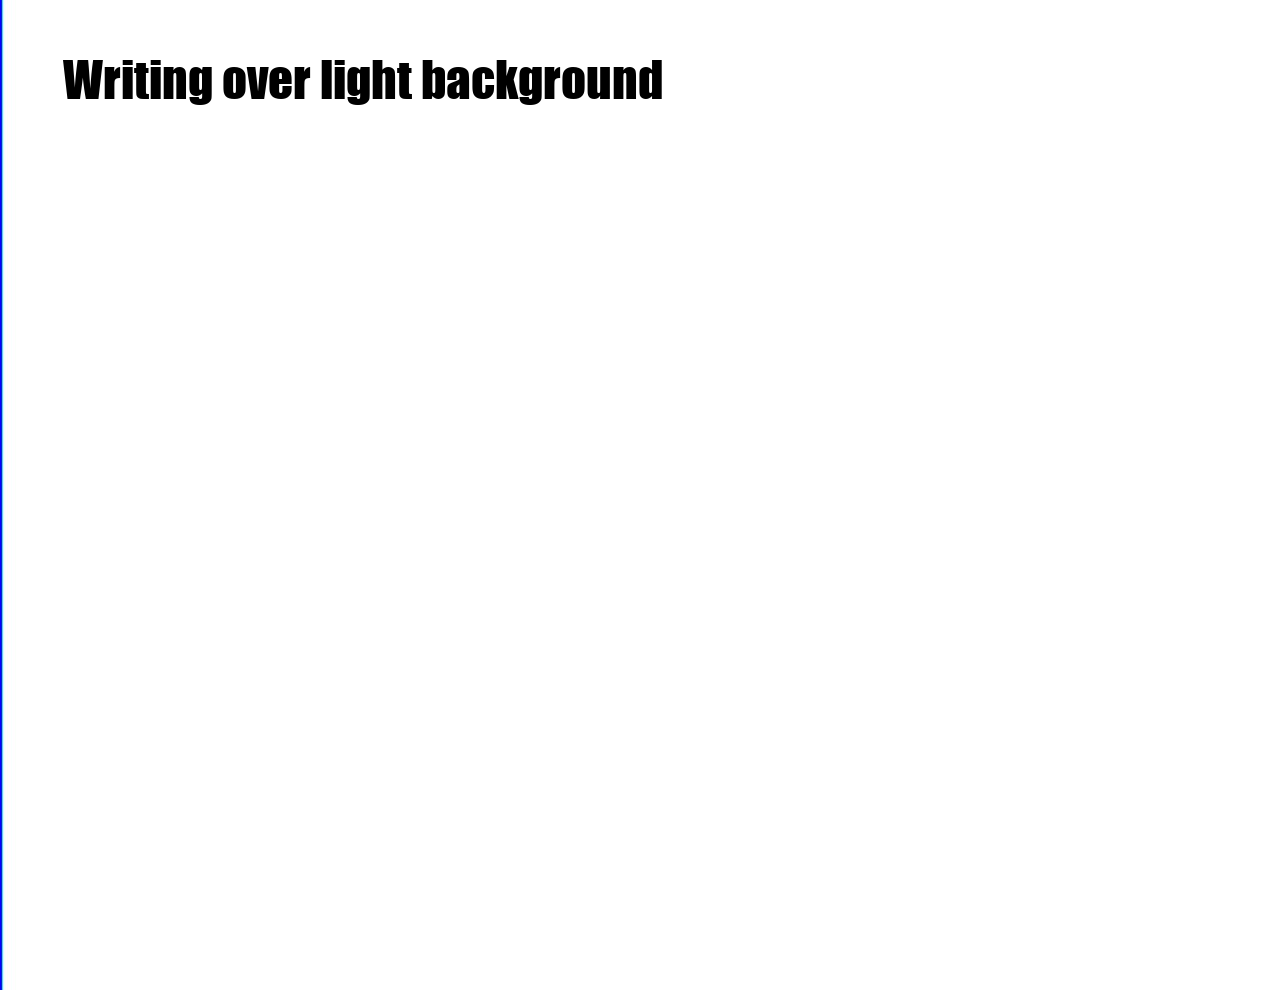

In [9]:
make_meme('Writing over light background','test/white.jpg',False,1)

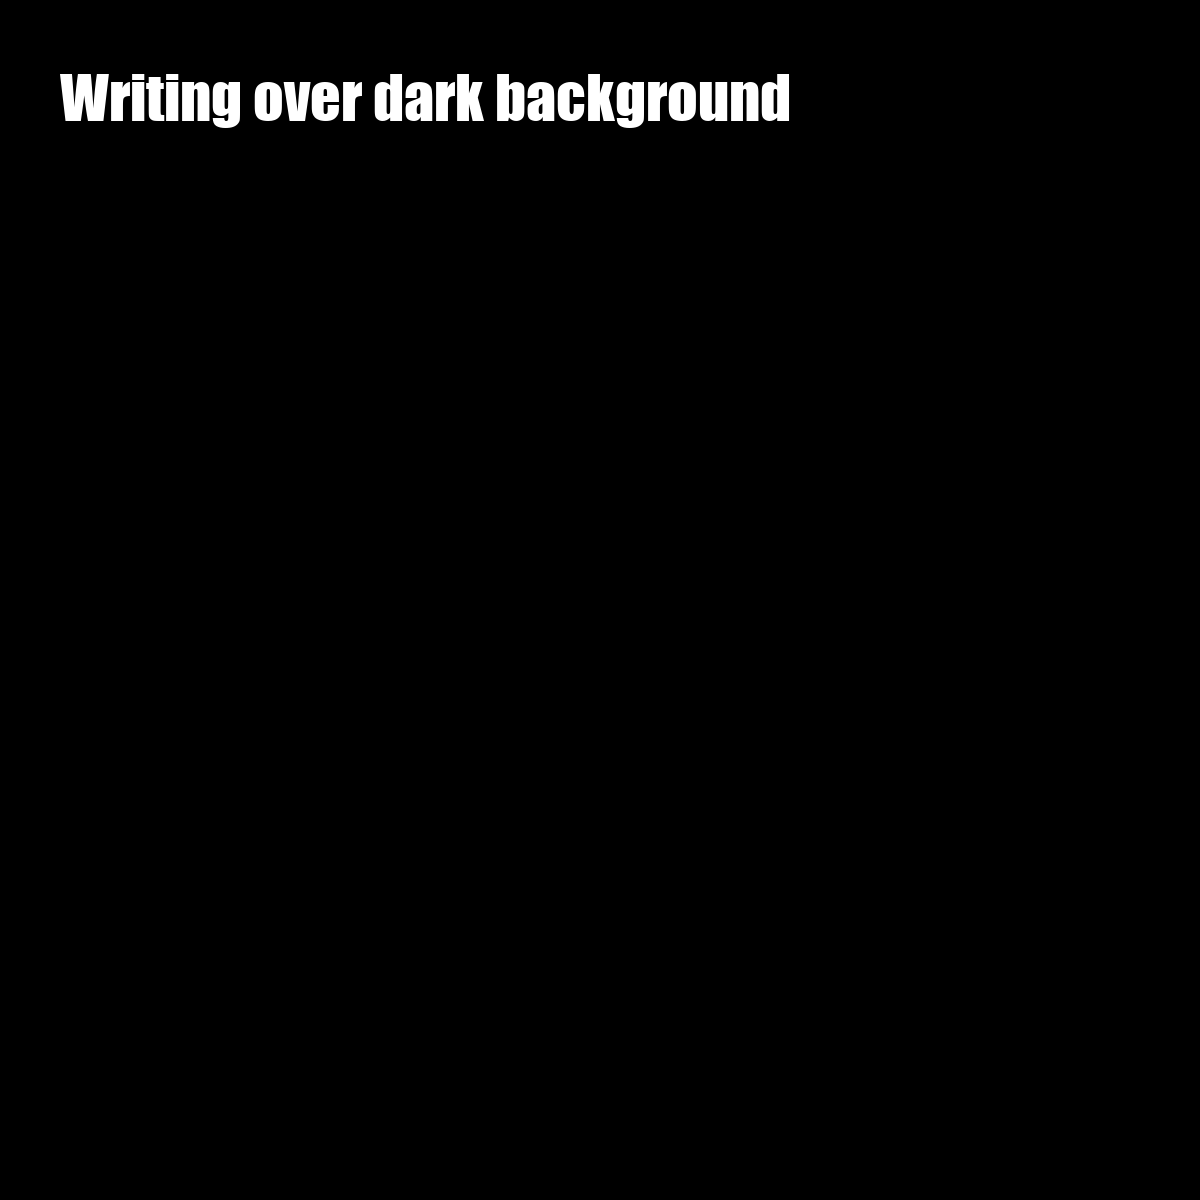

In [10]:
make_meme('Writing over dark background','test/black.jpg',True,2)

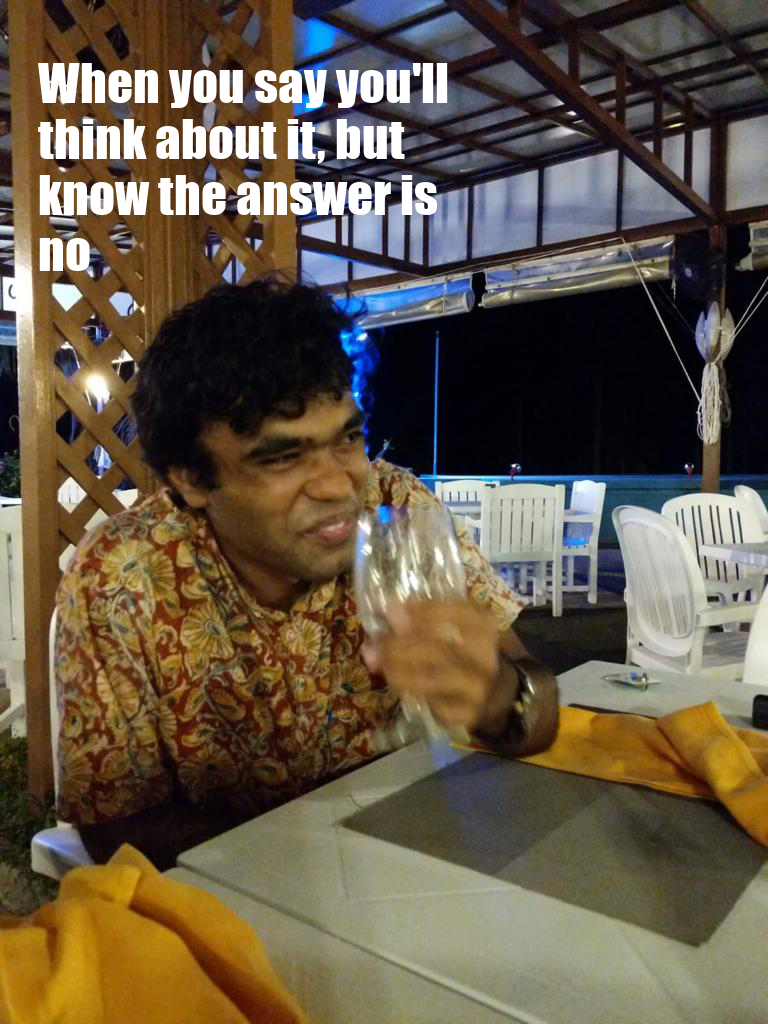

In [11]:
make_meme('When you say you\'ll think about it, but know the answer is no','test/meme.jpeg',True,3)